In [17]:
import sklearn 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn.metrics import pairwise_distances_argmin
#you can use Python’s imaging library (PIL)
from PIL import Image
from IPython.display import display
# or you can use opencv ## conda install anaconda::opencv
import cv2 #if you use cv2 remember to covert from BGR to RGB
import scipy.cluster.hierarchy as sch #you only for sch.dendrogram

df = pd.read_csv('Mall_Customers.csv')
with pd.option_context('future.no_silent_downcasting', True):
    df["Gender"] = df["Gender"].replace(to_replace=['Male', 'Female'], value=[-1, 1]).infer_objects() 
df = df.drop('CustomerID', axis=1) 


In [18]:
# compute the pairwise Euclidean distance matrix
def compute_distance_matrix(X):
    num_points = X.shape[0] #fives the no of rows / data points in X
    distance_matrix = np.zeros((num_points, num_points))
    
    for i in range(num_points):
        for j in range(i + 1, num_points):  # no redundant calculations
            distance_matrix[i, j] = np.linalg.norm(X[i] - X[j]) #euclidean distance
            distance_matrix[j, i] = distance_matrix[i, j]  # symmetric
    
    return distance_matrix

In [19]:
def ward_method(X):
    num_points = len(X)
    
    #each point is its own cluster
    clusters = {i: [i] for i in range(num_points)}
    cluster_sizes = {i: 1 for i in range(num_points)}

    # linkage matrix for hierarchical clustering
    matrix = []
    current_id = num_points  # new clusters start at ID 200
    
    while len(clusters) > 1:
        min_distance = float('inf')
        pair_to_merge = None
        
        # iterate over all pairs of clusters
        cluster_keys = list(clusters.keys())
        for i in range(len(cluster_keys)):
            for j in range(i + 1, len(cluster_keys)):
                cluster_i = cluster_keys[i]
                cluster_j = cluster_keys[j]
                
                # calculating the centroids
                points_i = np.array([X[p] for p in clusters[cluster_i]])
                points_j = np.array([X[p] for p in clusters[cluster_j]])
                centroid_i = np.mean(points_i, axis=0)
                centroid_j = np.mean(points_j, axis=0)
                
                #squared distances
                sq_dist_i = np.sum((points_i - centroid_i) ** 2)
                sq_dist_j = np.sum((points_j - centroid_j) ** 2)
                
                #combined cluster centroid
                combined_cluster = np.vstack((points_i, points_j))
                combined_centroid = np.mean(combined_cluster, axis=0)
                
                # squared distance for combined cluster
                sq_dist_combined = np.sum((combined_cluster - combined_centroid) ** 2)
                
                # ward distance
                ward_distance = sq_dist_combined - sq_dist_i - sq_dist_j
                
                if ward_distance < min_distance:
                    min_distance = ward_distance
                    pair_to_merge = (cluster_i, cluster_j)
                    # merge the closest clusters
                    
        i, j = pair_to_merge
        new_cluster = clusters[i] + clusters[j]
        clusters[current_id] = new_cluster
        
        matrix.append([i, j, min_distance, len(new_cluster)])
        
        # delete old clusters
        del clusters[i]
        del clusters[j]
        
        # increment cluster ID
        current_id += 1
    
    return np.array(matrix)
        

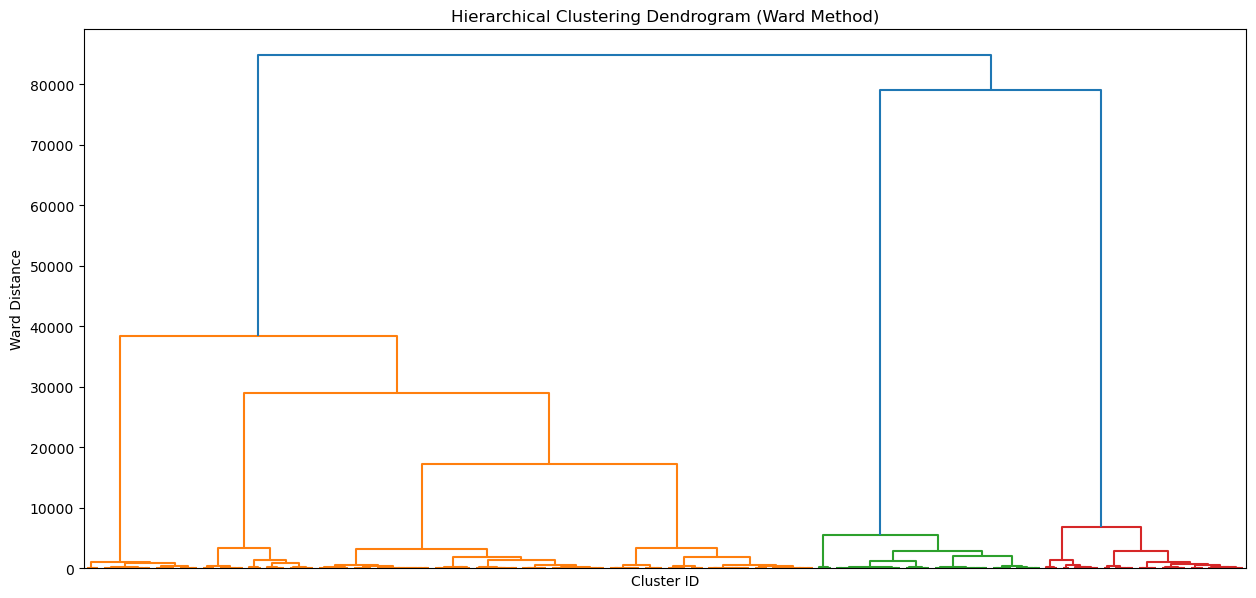

In [20]:

np.random.seed(42)  # for reproducibility
X = df.values
#X = np.random.rand(200, 2) 

# perform hierarchical clustering using Ward's method
linkage_matrix = ward_method(X)

plt.figure(figsize=(15, 7))
sch.dendrogram(
    linkage_matrix,
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=0.7 * max(linkage_matrix[:, 2])
)
plt.title("Hierarchical Clustering Dendrogram (Ward Method)")
plt.xlabel("Cluster ID")
plt.ylabel("Ward Distance")
plt.xticks([]) 
plt.show()